# Week 3 - Gravity Gradients

This week focuses on the influence of **gravity gradients** on the motion of rigid bodies in space. Gravity gradient effects arise due to the differential gravitational force across an extended body. By approximating these effects to the first order, the module examines how they perturb both the attitude and orbital motion of spacecraft. 

A key outcome of this week is the derivation of gravity gradient relative equilibria conditions. These equilibria are analyzed for stability through linearization techniques, providing insights into how spacecraft orientation naturally evolves in response to Earth's gravity field. 

Understanding gravity gradients is particularly important for passive stabilization methods, where external forces like gravity are exploited to maintain a desired attitude with minimal control effort.

<ins>**Learning Objectives**</ins>

- Describe the effect of gravity gradients on the motion of bodies in space
- Derive and apply the **gravity gradient torque**
- Develop equations of motion for a rigid body with multiple spinning components

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 3.1) Gravity Gradient Torque Derivation, $L_G$

**<ins>Why Model Gravity Gradient Torque for Rigid Bodies?</ins>**

In classical orbital mechanics, a spacecraft is often modeled as a **point mass**, which simplifies gravitational force calculations. However, this model breaks down when considering the spacecraft’s **attitude dynamics** — especially for satellites with **extended structures** and **non-uniform mass distributions**.

A **point mass**, by definition, has no spatial extent and therefore:
- Experiences a single gravitational force at its center of mass.
- Does **not** generate internal torques (no gravity gradient effects).
- Does **not** exhibit rotational dynamics from gravitational interactions.

In contrast, a **rigid body** — like a real satellite — has components distributed around its center of mass. Earth's gravity acts **differently** on each part of the spacecraft, leading to:
- A net **force** (determining orbital motion), and  
- A net **torque** due to differential attraction — this is the **gravity gradient torque**.

This torque tends to align the spacecraft’s **principal axis of inertia** with the local vertical, and becomes especially important in **Attitude Determination and Control Systems (ADCS)**, because:

- It offers a **passive stabilization mechanism** (e.g., nadir-pointing alignment).
- It introduces **persistent torques** that can interfere with precision pointing.
- It affects **long-term stability and drift** in both low and high Earth orbits.

Understanding and modeling gravity gradient torque is therefore essential for:
- Predicting the natural attitude behavior of the satellite,
- Designing passive stabilization schemes,
- And building robust control laws to mitigate or exploit these torques.

This sets the foundation for the derivation and analysis that follows.

<img src="Images/AmorphousPotato_GravityGradient.PNG" alt="Gravity Gradient Derivation Outline" width="550" align="left" style="margin-right: 20px;"/>

**<ins>Outline of the Derivation of $L_G$</ins>**

To understand the passive torques acting on a spacecraft due to gravity, we begin by analyzing how differential gravitational forces across an extended body produce a net torque — known as the **gravity gradient torque**.

The derivation proceeds from Newton’s Law of Universal Gravitation and builds up to a closed-form expression for $L_G$ using vector identities, integral operations, and inertia tensor properties.

<br><br>

**Key steps in the derivation:**
- Define the gravitational force acting on a differential mass element  
- Establish the torque generated by this differential force  
- Express the total gravity-induced torque about the spacecraft’s center of mass  
- Apply simplifying assumptions (e.g., $|\mathbf{r}| \ll |\mathbf{R}_c|$)  
- Use Taylor expansion and inertia tensor identities to simplify the integral  

By the end of this derivation, we will obtain an expression involving $[I]$, $\mathbf{R}_c$, and the radial direction unit vector $\hat{i}_r$, which governs how gravity induces passive rotational motion — a key component in attitude dynamics and stabilization.

## Step 1: Define the Gravitational Force Acting on a Mass Element

We begin by considering the gravitational interaction between two bodies: **Earth** (modeled as a point mass at its center) and a **spacecraft** modeled as a continuous distribution of mass.

To account for the extended nature of the spacecraft, we break it into infinitesimal mass elements $dm$. The gravitational force acting on each element due to Earth’s gravity is given by:

$$
d\mathbf{F}_G = -\frac{G M_e \, dm}{|\mathbf{R}|^2} \cdot \frac{\mathbf{R}}{|\mathbf{R}|} = -\frac{G M_e}{|\mathbf{R}|^3} \mathbf{R} \, dm
$$

where:
- $d\mathbf{F}_G$ is the differential gravitational force on the mass element $dm$,
- $G$ is the universal gravitational constant,
- $M_e$ is the mass of Earth,
- $\mathbf{R}$ is the position vector from Earth’s center to the mass element.

This equation is derived from **Newton’s law of universal gravitation**, which states that the force between two point masses is attractive and inversely proportional to the square of their separation.

The **negative sign** in this expression is important — it ensures that the direction of the force is **toward the source of gravity** (Earth's center). Since force is a vector, the equation reflects both:
- the **magnitude** of the gravitational pull (inversely proportional to $|\mathbf{R}|^2$), and  
- its **direction** (along $-\hat{\mathbf{R}}$ toward Earth).

## Step 2: Formulating the Gravitational Torque from Distributed Forces

To understand how gravity induces a **torque** on an extended spacecraft, we recognize that each mass element experiences a slightly different gravitational pull depending on its location relative to the center of mass.

This non-uniform force distribution generates a net **torque** about the spacecraft’s center of mass $C$. The differential torque contribution from each infinitesimal mass element is computed as:

$$
\mathbf{L}_G = \int_B \mathbf{r} \times d\mathbf{F}_G
$$

where:
- $\mathbf{L}_G$ is the total gravitational torque acting on the spacecraft,
- $\mathbf{r}$ is the position vector from the center of mass to the differential mass element $dm$,
- $d\mathbf{F}_G$ is the gravitational force acting on $dm$,
- The integral is evaluated over the full volume of the spacecraft $B$.

This expression captures the idea that **even if the net gravitational force pulls the spacecraft toward Earth**, the spatial variation of this force results in **rotational effects**. This will be particularly relevant for spacecraft with asymmetric mass distributions.

## Step 3: Substitute Gravitational Force into the Torque Integral

We now express the gravity gradient torque more explicitly by substituting the gravitational force expression into the torque integral.

Recall that the gravitational force acting on a mass element $dm$ is:

$$
d\mathbf{F}_G = -\frac{G M_e}{|\mathbf{R}|^3} (\mathbf{R}_c + \mathbf{r}) \, dm
$$

Substituting this into the torque integral gives:

$$
\mathbf{L}_G = - \int_B \mathbf{r} \times \frac{G M_e}{|\mathbf{R}|^3} (\mathbf{R}_c + \mathbf{r}) \, dm
$$

where:
- $\mathbf{R}_c$ is the vector from Earth's center to the spacecraft’s center of mass,
- $\mathbf{r}$ is the vector from the center of mass to the differential mass element $dm$.

This equation now expresses the **gravity gradient torque** in terms of the spacecraft’s geometry and its position relative to the central body.

> 💡 **Key Insight (Preview)**:  
> While the torque expression is still general at this stage, we will soon apply simplifying assumptions to reveal how this torque depends on the spacecraft’s mass distribution and orientation. This will ultimately show how gravity tends to align the satellite’s principal axes with the local vertical, a core output of **passive gravity-gradient stabilization**.

## Step 4: Simplifying the Torque Integral Expression

We observe that $G$, $M_e$, and the center-of-mass position vector $\mathbf{R}_c$ are **not functions of the differential mass element** $dm$. Although $\mathbf{R}_c$ varies over time (e.g., along an elliptical orbit), it remains **constant during the integration** over the body’s internal mass distribution.  
Therefore, with respect to the integration over the body $B$, we can treat $\mathbf{R}_c$ as a constant and **factor it out of the integral**.

> 📌 **Note:** The integration is over the spacecraft’s mass distribution — i.e., the variable of integration is $\mathbf{r}$, not $\mathbf{R}_c$.

Next, we apply the vector identity:

$$
\mathbf{a} \times \mathbf{b} = -\mathbf{b} \times \mathbf{a}
$$

to reverse the cross product order and eliminate the negative sign in the torque expression:

$$
\mathbf{L}_G = G M_e \int_B \frac{1}{|\mathbf{R}|^3} (\mathbf{R}_c + \mathbf{r}) \times \mathbf{r} \, dm
$$

This expands to:

$$
\mathbf{L}_G = G M_e \left( \int_B \frac{1}{|\mathbf{R}|^3} (\mathbf{R}_c \times \mathbf{r}) \, dm 
+ \underbrace{\int_B \frac{1}{|\mathbf{R}|^3} (\mathbf{r} \times \mathbf{r}) \, dm}_{= \mathbf{0}} \right)
$$

Which simplifies to:

$$
\mathbf{L}_G = G M_e \left( \mathbf{R}_c \times \int_B \frac{\mathbf{r}}{|\mathbf{R}|^3} \, dm \right)
$$

## Step 5: Linearizing $|\mathbf{R}_c + \mathbf{r}|^{-3}$ for Small Body Approximation

To compute the gravity gradient torque, we must expand the nonlinear term $|\mathbf{R}|^{-3}$ in the integral expression. Since $\mathbf{R} = \mathbf{R}_c + \mathbf{r}$ — where **$\mathbf{R}$** is a **vector** from Earth's center to a mass element, $\mathbf{R}_c$ is the **vector** from Earth's center to the spacecraft's center of mass, and $\mathbf{r}$ is the **vector** from the center of mass to a differential mass element — we write:

$$
|\mathbf{R}|^{-3} = |\mathbf{R}_c + \mathbf{r}|^{-3}
$$

> **Note**: In this derivation, **bold symbols** (e.g., $\mathbf{R}$, $\mathbf{R}_c$, $\mathbf{r}$) represent **vectors**, while unbolded symbols (e.g., $R$, $R_c$) denote their **scalar magnitudes** (i.e., $R = |\mathbf{R}|$).

This full expression is nonlinear and difficult to evaluate directly. However, since the spacecraft is small compared to its orbital radius ($|\mathbf{r}| \ll |\mathbf{R}_c|$), we apply a **first-order Taylor series expansion** to simplify the expression.


**<ins>Why Linearize $|\mathbf{R}|^{-3}$?</ins>**

This expression is **nonlinear** because it involves a vector norm raised to a power:

$$
|\mathbf{R}_c + \mathbf{r}|^{-3} = \left[ \sqrt{(R_{cx} + r_x)^2 + (R_{cy} + r_y)^2 + (R_{cz} + r_z)^2} \right]^{-3}
$$
$$
|\mathbf{R}_c + \mathbf{r}|^{-3} = \left[ (R_{cx} + r_x)^2 + (R_{cy} + r_y)^2 + (R_{cz} + r_z)^2 \right]^{-3/2}
$$

This is not just a polynomial — it includes cross-terms, square roots, and a negative fractional exponent. As such, it is **difficult to evaluate directly** in an integral over the volume of the spacecraft. That’s why we use a **first-order Taylor expansion** to simplify it, taking advantage of the fact that $|\mathbf{r}| \ll |\mathbf{R}_c|$ in orbital applications. For such simplification:


**<ins>Taylor Series Review</ins>**

We recall that the Taylor series of a scalar function $f(x)$ about a point $x_0$ is:

$$
f(x) \approx f(x_0) + \left. \frac{df}{dx} \right|_{x = x_0} (x - x_0) + \frac{1}{2} \left. \frac{d^2 f}{dx^2} \right|_{x = x_0} (x - x_0)^2 + \dots
$$

We define:

$$
f(\mathbf{r}) = |\mathbf{R}_c + \mathbf{r}|^{-3}
$$


**<ins>Zeroth-Order Term</ins>**

Evaluate at $\mathbf{r} = 0$:

$$
f(0) = |\mathbf{R}_c|^{-3} = R_c^{-3}
$$


**<ins>First Derivative Term</ins>**

Start by differentiating $f(\mathbf{r})$ with respect to $\mathbf{r}$:

$$
\frac{\partial}{\partial \mathbf{r}} |\mathbf{R}|^{-3} = -3 R^{-4} \cdot \frac{\partial R}{\partial \mathbf{r}}
$$

To compute $\frac{\partial R}{\partial \mathbf{r}}$, begin with the identity:

$$
R^2 = \mathbf{R} \cdot \mathbf{R} = (\mathbf{R}_c + \mathbf{r}) \cdot (\mathbf{R}_c + \mathbf{r})
$$

Expand the dot product:

$$
R^2 = R_c^2 + 2 \mathbf{R}_c \cdot \mathbf{r} + r^2
$$

Differentiate both sides with respect to $\mathbf{r}$:

$$
2R \cdot \frac{\partial R}{\partial \mathbf{r}} = \frac{\partial}{\partial \mathbf{r}}(R_c^2 + 2 \mathbf{R}_c \cdot \mathbf{r} + r^2)
= 2 \mathbf{R}_c + 2 \mathbf{r}
$$

Solve for $\frac{\partial R}{\partial \mathbf{r}}$:

$$
\frac{\partial R}{\partial \mathbf{r}} = \frac{\mathbf{R}_c + \mathbf{r}}{R}
$$

Substitute into the derivative of $|\mathbf{R}|^{-3}$:

$$
\frac{\partial}{\partial \mathbf{r}} |\mathbf{R}|^{-3}
= -3 R^{-4} \cdot \frac{\mathbf{R}_c + \mathbf{r}}{R}
= -3 R^{-5} (\mathbf{R}_c + \mathbf{r})
$$

Evaluating at $\mathbf{r} = 0$:

$$
\left. \frac{\partial f}{\partial \mathbf{r}} \right|_{\mathbf{r}=0}
= -\frac{3}{R_c^5} \mathbf{R}_c
$$


**<ins>First-Order Taylor Expansion</ins>**

Apply the expansion:

$$
f(\mathbf{r}) \approx f(0) + \left. \frac{\partial f}{\partial \mathbf{r}} \right|_{\mathbf{r}=0} \cdot \mathbf{r}
$$

Substitute:

$$
f(\mathbf{r}) \approx \frac{1}{R_c^3} - \frac{3}{R_c^5} \mathbf{R}_c \cdot \mathbf{r}
$$

Factor out $1/R_c^3$:

$$
f(\mathbf{r}) \approx \frac{1}{R_c^3} \left( 1 - \frac{3}{R_c^2} \mathbf{R}_c \cdot \mathbf{r} \right)
$$


**<ins>Alternative Derivation: Binomial Expansion</ins>**

We can write:

$$
|\mathbf{R}|^{-3} = (R_c^2 + 2 \mathbf{R}_c \cdot \mathbf{r} + r^2)^{-3/2}
$$
$$
|\mathbf{R}|^{-3} = R_c^{-3} (1 + \frac{2 \mathbf{R}_c \cdot \mathbf{r}}{R_c^2} + \frac{r^2}{R_c^2})^{-3/2}
$$

Using:

$$
(1 + x)^n \approx 1 + nx \quad \text{for } |x| \ll 1
$$

Let $x = \frac{2 \mathbf{R}_c \cdot \mathbf{r} + r^2}{R_c^2}$:

$$
|\mathbf{R}|^{-3} \approx \frac{1}{R_c^3} \left( 1 - \frac{3}{R_c^2} \mathbf{R}_c \cdot \mathbf{r} \right)
$$


**<ins>Summary of Step 5</ins>**

- The approximation is valid for small spacecraft dimensions: $|\mathbf{r}| \ll |\mathbf{R}_c|$. --> (Maybe not the Death star!!)
- The linear dependence on $\mathbf{R}_c \cdot \mathbf{r}$ will drive the emergence of the **gravity gradient torque** as we substitute this into the integral expression for $\mathbf{L}_G$.

## Step 6: Deriving the Closed-Form Gravity Gradient Torque Expression

We begin from the expression obtained in step 4:

$$
\mathbf{L}_G = G M_e \mathbf{R}_c \times \int_B \frac{\mathbf{r}}{|\mathbf{R}|^3} \, dm
$$


**Substitute the approximation for** $|\mathbf{R}|^{-3}$ **from the first-order Taylor expansion**:

$$
\mathbf{L}_G = G M_e \mathbf{R}_c \times \int_B \mathbf{r} \left( \frac{1}{(R_c)^3} \left( 1 - \frac{3 \, \mathbf{R}_c \cdot \mathbf{r}}{(R_c)^2} \right) \right) dm
$$

Factor out constants:

$$
\mathbf{L}_G = \frac{G M_e}{(R_c)^3} \mathbf{R}_c \times \int_B \mathbf{r} \left( 1 - \frac{3 \, \mathbf{R}_c \cdot \mathbf{r}}{(R_c)^2} \right) dm
$$


**Apply the center of mass condition**:

For any rigid body with its origin at the center of mass:

$$
\int_B \mathbf{r} \, dm = 0
$$

So the first term vanishes, and we are left with:

$$
\mathbf{L}_G = \frac{3 G M_e}{R_c^5} \mathbf{R}_c \times \int_B -\mathbf{r} (\mathbf{r} \cdot \mathbf{R}_c) \, dm
$$


**Apply the vector triple product identity**:

We use:

$$
\mathbf{a} \times (\mathbf{b} \times \mathbf{c}) = (\mathbf{a} \cdot \mathbf{c}) \mathbf{b} - (\mathbf{a} \cdot \mathbf{b}) \mathbf{c}
$$

From this, we can write:

$$
-(\mathbf{r} \cdot \mathbf{R}_c) \mathbf{r} = -\mathbf{r} \times (\mathbf{r} \times \mathbf{R}_c) - (\mathbf{r} \cdot \mathbf{r}) \mathbf{R}_c
$$


**Substitute into the torque integral**:

$$
\mathbf{L}_G = \frac{3 G M_e}{R_c^5} \mathbf{R}_c \times \int_B -\left( \mathbf{r} \times (\mathbf{r} \times \mathbf{R}_c) + (\mathbf{r} \cdot \mathbf{r}) \mathbf{R}_c \right) dm
$$


**Use the tilde matrix representation**:

The skew-symmetric matrix identity gives:

$$
[\tilde{\mathbf{r}}] [\tilde{\mathbf{r}}] \mathbf{R}_c = \mathbf{r} \times (\mathbf{r} \times \mathbf{R}_c)
$$

So we rewrite:

$$
\mathbf{L}_G = \frac{3 G M_e}{R_c^5} \mathbf{R}_c \times \left( \int_B -[\tilde{\mathbf{r}}] [\tilde{\mathbf{r}}] dm \right) \mathbf{R}_c - \frac{3 G M_e}{R_c^5} \left( \int_B r^2 dm \right) \mathbf{R}_c \times \mathbf{R}_c
$$

Note that $\mathbf{R}_c \times \mathbf{R}_c = \mathbf{0}$, so the second term vanishes.


**Define the inertia tensor in matrix form**:

$$
\mathcal{B} [I_c] = \int_B -[\tilde{\mathbf{r}}] [\tilde{\mathbf{r}}] dm = \int_B 
\begin{bmatrix}
r_2^2 + r_3^2 & -r_1 r_2 & -r_1 r_3 \\
-r_1 r_2 & r_1^2 + r_3^2 & -r_2 r_3 \\
-r_1 r_3 & -r_2 r_3 & r_1^2 + r_2^2
\end{bmatrix} dm
$$


**Final closed-form expression**:

We arrive at the elegant and powerful final result for the gravity gradient torque acting on a rigid body:

$$
\boxed{\mathbf{L}_G = \frac{3 G M_e}{R_c^5} \, \mathbf{R}_c \times [I] \mathbf{R}_c}
$$

> 📌 **Frame-Agnostic Nature of the Gravity Gradient Torque Expression**
>
> The final closed-form expression for the gravity gradient torque is derived **without assuming a specific frame of reference** --> it is **frame agnostic**.
However, to **apply** this expression meaningfully:
> - ✅ Ensure that **all quantities** — the inertia tensor $[I]$ and the position vector $\mathbf{R}_c$ — are expressed **in the same reference frame**.
> - 🔄 If a **coordinate transformation** is required (e.g., from body frame to orbit frame), then the transformation must be applied consistently to **all terms** in the equation — including both vector and tensor quantities.
>
> This reinforces the importance of frame consistency when implementing attitude dynamics models in simulations or flight software.

## Step 7: Introducing the Orbit Frame — A Natural Choice for Expressing $\mathbf{L}_G$

Having derived the general form of the **gravity gradient torque** we must now consider **which frame of reference** to give some physical sense to the equation.

To simplify the representation and computation of $\mathbf{L}_G$, we will now introduce the **orbit frame** $\mathcal{O}$ — a **non-inertial reference frame** that moves with the spacecraft.

<img src="Images/OrbitFrame.PNG" alt="Orbit Frame Diagram" width="400" align="left" style="margin-right: 20px;"/>

**<ins>Why Introduce the Orbit Frame?</ins>**

- The **Earth-Centered Inertial (ECI)** frame is inertial and does not rotate with Earth.  
- The **Earth-Centered Earth-Fixed (ECEF)** frame rotates with Earth.  
- The **orbit frame** $\mathcal{O}$ is **body-attached and non-inertial**. It rotates with the spacecraft along its orbit.

This makes the orbit frame especially useful when analyzing attitude dynamics, as it **naturally aligns with the satellite’s trajectory**.

**<ins>Definition of the Orbit Frame</ins>**

The orbit frame $\mathcal{O} = \{ \hat{\mathbf{o}}_1, \hat{\mathbf{o}}_2, \hat{\mathbf{o}}_3 \}$ is defined as follows:

- $\hat{\mathbf{o}}_3$: Unit vector from Earth’s center to the spacecraft (radial direction),
- $\hat{\mathbf{o}}_1$: Unit vector along the velocity direction (tangential direction),
- $\hat{\mathbf{o}}_2$: Unit vector completing the right-handed system (normal to the orbital plane).

In this frame, the center-of-mass position vector is:

$$
\mathbf{R}_c = R_c \, \hat{\mathbf{o}}_3
= \mathcal{O}
\begin{bmatrix}
0 \\
0 \\
R_c
\end{bmatrix}
$$

This means the spacecraft’s COM vector **always lies along** $\hat{\mathbf{o}}_3$ in this frame, simplifying torque computations.

**<ins>Key Implications</ins>**

- The orbit frame rotates once per orbit **relative to the inertial frame**, but remains fixed **relative to the spacecraft's orbital motion**.
- Expressing $\mathbf{L}_G$ in the orbit frame makes it easier to identify **relative equilibrium conditions**, where certain torques vanish due to specific spacecraft orientations.
- When implementing this in simulations, ensure that **$[I]$ and $\mathbf{R}_c$ are expressed in the same frame**. If a coordinate transformation is necessary, it must be applied consistently to all terms.

By anchoring our analysis to the orbit frame, we gain **physical intuition** and **mathematical simplicity**, both essential for designing effective passive attitude control strategies based on gravity-gradient stabilization.

<img src="Images/OrbitandBodyframe.png" alt="Orbit and Body Frame" width="400" align="left" style="margin-right: 20px;"/>

**<ins>Transforming to the Body Frame</ins>**

Since the rigid body dynamics are typically expressed in the **body frame** $\mathcal{B}$, we need to express the center of mass position vector in this frame.

Using the transformation between the **orbit frame** $\mathcal{O}$ and the **body frame** $\mathcal{B}$, we write:

$$
\mathbf{R}_c =
\begin{bmatrix}
R_{c1} \\
R_{c2} \\
R_{c3}
\end{bmatrix}^{\mathcal{B}}
= [BO]
\begin{bmatrix}
0 \\
0 \\
R_c
\end{bmatrix}^{\mathcal{O}}
$$

where:

- $\mathbf{R}_c^{\mathcal{B}}$ is the **center of mass position vector** in the **body frame** $\mathcal{B}$  
- $[BO]$ is the **rotation matrix** that transforms vectors from $\mathcal{O}$ to $\mathcal{B}$  
- $\mathbf{R}_c^{\mathcal{O}} = (0, 0, R_c)^T$ is the position expressed in the **orbit frame**

This transformation allows us to **analyze the gravity gradient torque** in the spacecraft **body frame**, which is the most natural frame for describing its rotational dynamics.

Assuming the spacecraft's inertia tensor $[I]$ is defined in its principal axes frame, where it takes a diagonal form, the gravity gradient torque can now be written explicitly as:

$$
\mathbf{L}_G = \frac{3 G M_e}{R_c^5} 
\begin{bmatrix}
R_{c1} \\
R_{c2} \\
R_{c3}
\end{bmatrix}
\times
\begin{bmatrix}
I_1 & 0 & 0 \\
0 & I_2 & 0 \\
0 & 0 & I_3
\end{bmatrix}
\begin{bmatrix}
R_{c1} \\
R_{c2} \\
R_{c3}
\end{bmatrix}
$$

Expanding this matrix expression yields:

$$
\boxed{
\mathbf{L}_G =
\begin{bmatrix}
L_{G1} \\
L_{G2} \\
L_{G3}
\end{bmatrix} =
\frac{3 G M_e}{R_c^5}
\begin{bmatrix}
R_{c2} R_{c3} (I_{33} - I_{22}) \\
R_{c1} R_{c3} (I_{11} - I_{33}) \\
R_{c1} R_{c2} (I_{22} - I_{11})
\end{bmatrix}
}
$$

This result shows that the **gravity gradient torque depends on the spacecraft’s inertia properties and orientation** with respect to its orbital frame.

<br>

**<ins>Torque-Free Conditions</ins>**

The torque (or some components of it) can be **zero** under special conditions:

- If two of the principal moments of inertia are equal:

  $$
  I_{ii} = I_{jj}
  $$

- If the spacecraft center of mass is aligned along a principal body axis:

  $$
  \mathbf{R}_c = R_c \hat{b}_i
  $$

These conditions can lead to **gravity-gradient stability** or **zero net torque**, which is useful for designing passively stable spacecraft.

---

# 3.2) Gravitational Force, $F_G$, Modeling for Rotating Rigid Bodies

## 3.2.1 - Physical Motivation: Why and How Rigid Bodies Experience Force Differently

In this section, we investigate the coupling between a spacecraft's **translational motion** (i.e., orbital motion of its center of mass) and its **rotational motion** (i.e., attitude dynamics), and how each influences the other.

A rigorous analysis requires us to understand how the **total gravitational force**, $\mathbf{F}_G$, acting on an extended rigid body governs the motion of its **center of mass**.

From classical astrodynamics, the motion of a **point mass** $m$ under gravity is governed by:

$$
\ddot{\mathbf{R}}_c = - \frac{G M_e}{R_c^3} \mathbf{R}_c
$$

or equivalently, applying Newton's Second Law:

$$
m \ddot{\mathbf{R}}_c = - \frac{G M_e}{R_c^3} \, m \mathbf{R}_c
$$

This formulation assumes that all of the spacecraft's mass is concentrated at a single point. Under this assumption, gravity acts through the center of mass, and **no torque** is produced — there is no "lever arm" to induce rotation.

However, real spacecraft are **extended rigid bodies** — their mass is distributed about the center of mass, not concentrated at a single point. As such, each mass element experiences a **slightly different gravitational force** due to its unique position relative to the central body (e.g., Earth).

This has two key implications:

- These differential forces **do not act at a single point**, and therefore generate a **net torque** about the center of mass. This is the source of **gravity-gradient torque**, which we derived earlier.
- These same differential forces also sum to a **net force $\mathbf{F}_G$** that, while dominated by the standard Newtonian term, is **slightly perturbed by the spacecraft’s orientation and mass distribution**.

This section explores the second effect in detail:  
**How does the rotation (attitude) of a rigid body affect the net gravitational force acting on it?**

> **Motivation:**  
While the classical gravitational force expression suffices for point masses, it becomes inadequate for extended bodies in orbit. For high-fidelity modeling, especially in precision navigation and control applications, we must account for how a rotating mass distribution subtly perturbs the force itself.

This study derives the expression for $\mathbf{F}_G$ acting on a rigid body and quantifies how its orientation — via attitude-dependent coupling — influences the resulting force. Our goal is to understand the **physical implications** and **practical significance** of this coupling in orbital mechanics.

## 3.2.2 - Deriving the net gravitational force, $F_G$, on a Rigid Body

The total gravitational force acting on the rigid body is given by integrating over all differential mass elements:

$$
\mathbf{F}_G = \int_B d\mathbf{F}_G = -G M_e \int_B \frac{\mathbf{R}}{|\mathbf{R}|^3} dm
$$

To evaluate this integral analytically, we apply a **Taylor series expansion** up to the 2nd order to approximate the nonlinear term:

$$
\frac{1}{|\mathbf{R}|^3} \approx \frac{1}{R_c^3} \left[ 1 - \frac{3}{2} \left( \frac{2 \mathbf{R}_c \cdot \mathbf{r}}{R_c^2} + \frac{r \cdot r}{R_c^2} \right) + \frac{15}{2} \frac{(\mathbf{R}_c \cdot \mathbf{r})^2}{R_c^4} \right]
$$

> 🔍 **Why retain 2nd-order terms?**  
> 
> When we perform a Taylor expansion of $|\mathbf{R}|^{-3} = |\mathbf{R}_c + \mathbf{r}|^{-3}$ about $\mathbf{r} = 0$, the approximation yields:
> 
> $$
  \frac{1}{|\mathbf{R}|^3} \approx \frac{1}{R_c^3} + \left( -\frac{3}{R_c^5} \mathbf{R}_c \cdot \mathbf{r} \right) + \dots
  $$
> 
> Plug this into the gravitational force integral:
> 
> $$
  \mathbf{F}_G = -GM_e \int_B \left( \frac{\mathbf{R}_c + \mathbf{r}}{|\mathbf{R}|^3} \right) dm
  $$
> 
> Substituting the expansion:
> 
> $$
  \mathbf{F}_G \approx -GM_e \int_B \left[ (\mathbf{R}_c + \mathbf{r}) \left( \frac{1}{R_c^3} - \frac{3}{R_c^5} \mathbf{R}_c \cdot \mathbf{r} \right) 
  \right] dm
  $$
> 
> Expanding and grouping terms:
> 
> $$
  \mathbf{F}_G \approx -GM_e \left[  \frac{\mathbf{R}_c}{R_c^3} \int_B dm +
  \frac{1}{R_c^3} \int_B \mathbf{r} \, dm -
  \frac{3 \mathbf{R}_c}{R_c^5} \int_B (\mathbf{R}_c \cdot \mathbf{r}) \, dm -
  \frac{3}{R_c^5} \int_B \mathbf{r} (\mathbf{R}_c \cdot \mathbf{r}) \, dm
  \right]
  $$
>
> Now observe the followinf:
> - The **second integral** $\int_B \mathbf{r} \, dm = 0$ by definition of the **center of mass**.
> - The **third integral** vanishes as well because $\mathbf{R}_c$ is constant and factors out as such:
> 
>   $$
    \int_B (\mathbf{R}_c \cdot \mathbf{r}) \, dm = \mathbf{R}_c \cdot \int_B \mathbf{r} \, dm = 0
    $$
>
> Therefore, **all first-order terms vanish**, and the **lowest-order correction** comes from the **fourth term**, which is **second order** in $\mathbf{r}$:
> 
> $$
  \mathbf{F}_G = - \frac{GM_e m}{R_c^3} \mathbf{R}_c + \text{(second-order correction)}
  $$
>
> Therefore, **all first-order terms vanish explicitly due to the center-of-mass corollary**, and we see clearly that the lowest-order nonzero correction terms are **second-order in $\mathbf{r}$**.
> 
> Thus, the gravitational force integral must be expanded at least to **second order** to capture the first nontrivial corrections that emerge due to the spacecraft’s extended mass distribution.
>
> A numerical study could potentially be done to see the % change between the 1st, 2nd and maybe up to 3rd order terms when expanding $|\mathbf{R}|^{-3}$


The gravity force expression:

$$
\mathbf{F}_G = 
-\frac{G M_e}{R_c^3} 
\left[
\int_B \mathbf{r} dm 
-\frac{3}{R_c^2} \int_B (\mathbf{r} \cdot \mathbf{R}_c) \mathbf{r} dm
-\frac{3}{R_c^2} \int_B (\mathbf{R}_c \cdot \mathbf{r}) \mathbf{R}_c dm 
+\mathbf{R}_c \int_B dm 
-\frac{3}{2R_c^2} \int_B \mathbf{R}_c (r \cdot r) dm 
+\frac{15}{2 R_c^4} \int_B (\mathbf{R}_c \cdot \mathbf{r})^2 \mathbf{R}_c dm
\right]
$$

Note the center-of-mass condition:

$$
\int_B \mathbf{r} dm = 0
$$

This holds because the center of mass is defined as the weighted average of all mass elements. In the center of mass frame, the sum of all relative position vectors $\mathbf{r}$ must cancel out, ensuring the integral evaluates to zero.

Then given the centre-of-mass condition and the linearity in integration, observe that the following terms in $\mathbf{F}_G$:

- $\int_B \mathbf{r} dm = 0$
- $-\frac{3}{R_c^2} \int_B (\mathbf{R}_c \cdot \mathbf{r}) \mathbf{R}_c dm = -\frac{3}{R_c^2} (\mathbf{R}_c \cdot \int_B \mathbf{r} dm) \mathbf{R}_c = 0$

Note that the $\mathbf{R}_c$ is a constant, thus enabling us to 'pull' it out of the integral conveniently. This results in,

$$
\mathbf{F}_G = 
-\frac{G M_e}{R_c^3} 
\left[
-\frac{3}{R_c^2} \int_B (\mathbf{r} \cdot \mathbf{R}_c) \mathbf{r} dm
+\mathbf{R}_c \int_B dm 
-\frac{3}{2R_c^2} \int_B \mathbf{R}_c (r \cdot r) dm 
+\frac{15}{2 R_c^4} \int_B (\mathbf{R}_c \cdot \mathbf{r})^2 \mathbf{R}_c dm
\right]
$$

$$
\mathbf{F}_G = 
-\frac{G M_e}{R_c^3} 
\left[
\mathbf{R}_c \int_B dm 
-\frac{3}{R_c^2} \int_B (\mathbf{r} \cdot \mathbf{R}_c) \mathbf{r} dm
-\frac{3}{2R_c^2} \int_B \mathbf{R}_c (r \cdot r) dm 
+\frac{15}{2 R_c^4} \int_B (\mathbf{R}_c \cdot \mathbf{r})^2 \mathbf{R}_c dm
\right]
$$

$$
\mathbf{F}_G = 
-\frac{G M_e}{R_c^3} 
\left[
m \mathbf{R}_c 
-\frac{3}{R_c^2} \int_B (\mathbf{r} \cdot \mathbf{R}_c) \mathbf{r} dm
-\frac{3}{2R_c^2} \int_B \mathbf{R}_c (r \cdot r) dm 
+\frac{15}{2 R_c^4} \int_B (\mathbf{R}_c \cdot \mathbf{r})^2 \mathbf{R}_c dm
\right]
$$

Recall the following vector identity we used in the derivation of $\mathbf{F}_G$:

$$
-(\mathbf{r} \cdot \mathbf{R}_c) \mathbf{r} = -\mathbf{r} \times (\mathbf{r} \times \mathbf{R}_c) - (\mathbf{r} \cdot \mathbf{r}) \mathbf{R}_c
$$

$$
(\mathbf{r} \cdot \mathbf{R}_c) \mathbf{r} = \mathbf{r} \times (\mathbf{r} \times \mathbf{R}_c) + r^2 \mathbf{R}_c
$$

This leads to:

$$
\mathbf{F}_G = 
-\frac{G M_e}{R_c^3} 
\left[
m \mathbf{R}_c 
-\frac{3}{R_c^2} \int_B \left( \mathbf{r} \times (\mathbf{r} \times \mathbf{R}_c) + r^2 \mathbf{R}_c \right) dm
-\frac{3}{2 R_c^2} \int_B r^2 dm \mathbf{R}_c 
+\frac{15}{2 R_c^4} \int_B \mathbf{R}_c \cdot \left( \mathbf{r} \times (\mathbf{r} \times \mathbf{R}_c) + r^2 \mathbf{R}_c \right) \mathbf{R}_c dm
\right]
$$

Next note the following identities:

- $\int_B r^2 dm = \frac{1}{2} \text{tr}([I])$ (polar moment of inertia)
- $\hat{i}_r = \frac{\mathbf{R}_c}{R_c}$ (unit vector in the radial direction)

Also note the inertia matrix defintion:

$$
[I] = \int_B -[\tilde{r}][\tilde{r}] dm
$$

and, given that

$$
a \times b = [\tilde{a}]b
$$

then,

$$
(\mathbf{r} \cdot \mathbf{R}_c) \mathbf{r} = [\tilde{r}] [\tilde{r}] \mathbf{R}_c + r^2 \mathbf{R}_c
$$

So,

$$
\mathbf{F}_G = 
-\frac{G M_e}{R_c^3} 
\left[
m \mathbf{R}_c 
-\frac{3}{R_c^2} \int_B \left( [\tilde{r}] [\tilde{r}] \mathbf{R}_c) + r^2 \mathbf{R}_c \right) dm
-\frac{3}{2 R_c^2} \int_B r^2 dm \mathbf{R}_c 
+\frac{15}{2 R_c^4} \int_B \mathbf{R}_c \cdot (\left( [\tilde{r}] [\tilde{r}] \mathbf{R}_c) + r^2 \mathbf{R}_c \right) \mathbf{R}_c dm
\right]
$$

Rewriting the integrals separately for the 2nd term,

$$
\mathbf{F}_G = 
-\frac{G M_e}{R_c^3} 
\left[
m \mathbf{R}_c 
-\frac{3}{R_c^2} \int_B [\tilde{r}] [\tilde{r}] dm \mathbf{R}_c
-\frac{3}{R_c^2} \int_B r^2  dm \mathbf{R}_c
-\frac{3}{2 R_c^2} \int_B r^2 dm \mathbf{R}_c 
+\frac{15}{2 R_c^4} \int_B \mathbf{R}_c \cdot (\left( [\tilde{r}] [\tilde{r}] \mathbf{R}_c) + r^2 \mathbf{R}_c \right) \mathbf{R}_c dm
\right]
$$

Applying the inertia tensor and trace identities while simultaneously 'splitting' the integrals for the 4th term,

$$
\mathbf{F}_G = 
-\frac{G M_e}{R_c^3} 
\left[
m \mathbf{R}_c 
+\frac{3}{R_c^2} [I] \mathbf{R}_c
-\frac{3}{R_c^2} \frac{1}{2} \text{tr}([I]) \mathbf{R}_c
-\frac{3}{2 R_c^2} \frac{1}{2} \text{tr}([I]) \mathbf{R}_c 
+\frac{15}{2 R_c^4} \int_B \mathbf{R}_c \cdot ([\tilde{r}] [\tilde{r}] \mathbf{R}_c) dm \mathbf{R}_c
+\frac{15}{2 R_c^4} \int_B R_c^2 r^2 dm \mathbf{R}_c
\right]
$$


Invoking the inertia tensor and trace identity definition again on the 4th term,

$$
\mathbf{F}_G = 
-\frac{G M_e}{R_c^3} 
\left[
m \mathbf{R}_c 
+\frac{3}{R_c^2} [I] \mathbf{R}_c
-\frac{9}{4 R_c^2} \text{tr}([I]) \mathbf{R}_c
-\frac{15}{2 R_c^4} (\mathbf{R}_c \cdot [I] \mathbf{R}_c) \mathbf{R}_c
+\frac{15}{4 R_c^2} \text{tr}([I]) \mathbf{R}_c
\right]
$$

$$
\mathbf{F}_G = 
-\frac{G M_e}{R_c^3} 
\left[
m \mathbf{R}_c 
+\frac{3}{R_c^2} [I] \mathbf{R}_c
+\frac{6}{4 R_c^2} \text{tr}([I]) \mathbf{R}_c
-\frac{15}{2 R_c^4} (\mathbf{R}_c^T [I] \mathbf{R}_c) \mathbf{R}_c
\right]
$$

Factorizing out the vector $\mathbf{R}_c$,

$$
\mathbf{F}_G = 
-\frac{G M_e}{R_c^3} 
\left[
\left(
m 
+\frac{3}{R_c^2} [I]
+\frac{6}{4 R_c^2} \text{tr}([I])
-\frac{15}{2 R_c^4} (\mathbf{R}_c^T [I] \mathbf{R}_c)
\right) \mathbf{R}_c
\right]
$$

Recognizing the $\hat{i}_r$ identity,

$$
\mathbf{F}_G = 
-\frac{G M_e}{R_c^3} 
\left[
\left(
m 
+\frac{3}{R_c^2} [I]
+\frac{6}{4 R_c^2} \text{tr}([I])
-\frac{15}{2 R_c^2} (\frac{\mathbf{R}_c^T}{R_c} [I] \frac{\mathbf{R}_c}{R_c})
\right) \mathbf{R}_c
\right]
$$

$$
\mathbf{F}_G = 
-\frac{G M_e}{R_c^3} 
\left[
\left(
m 
+\frac{3}{R_c^2} [I]
+\frac{6}{4 R_c^2} \text{tr}([I])
-\frac{15}{2 R_c^2} (\hat{i}_r^T [I] \hat{i}_r)
\right) \mathbf{R}_c
\right]
$$

Factorizing out $\frac{3}{R_c^2}$,

$$
\mathbf{F}_G = 
-\frac{G M_e}{R_c^3} 
\left[
\left(
m 
+\frac{3}{R_c^2} 
\left( [I] + \frac{2}{4} \text{tr}([I]) - \frac{5}{2} \hat{i}_r^T [I] \hat{i}_r \right)
\right) \mathbf{R}_c
\right]
$$

Factorizing out $m$,

$$
\mathbf{F}_G = 
-\frac{G M_e m}{R_c^3} 
\left[
1 
+\frac{3}{mR_c^2} 
\left( [I] + \frac{1}{2} \text{tr}([I]) - \frac{5}{2} \hat{i}_r^T [I] \hat{i}_r \right)
\right] \mathbf{R}_c
$$

Finally,

$$
\boxed{
\mathbf{F}_G = 
-\frac{\mu m}{R_c^3}
\left[
1 + \frac{3}{m R_c^2}
\left(
[I] + \frac{1}{2} \left( \text{tr}([I]) - 5 (\hat{i}_r^T[I]\hat{i}_r) \right) [I_{3\times3}]
\right)
\right] \mathbf{R}_c
}
$$

The first term in our gravitational force expression corresponds to the **standard Newtonian gravitational attraction** experienced by a point mass at the spacecraft's center of mass, following the familiar inverse-square law.

The second term is a **correction due to gravitational gradient effects**, which arise because the spacecraft is an extended body with mass distributed over a volume.

Since spacecraft are typically **much smaller than their orbital radius** $R_c$, this gradient-induced correction is **very small** compared to the primary gravitational force. Even if the spacecraft rotates—causing the radial direction unit vector $\hat{i}_r$ to vary in the body frame—this **rotation-to-translation coupling** is still **negligible for a first-order approximation**.

> 💡 **Key Insight:**  
> While the **gravity gradient force** is often small in magnitude, it becomes more relevant in:
> - **Elliptical orbits**, where $R_c$ changes significantly over time,
> - The computation of **gravity gradient torques**, which are more sensitive to the spacecraft’s orientation and mass distribution.

This motivates our simulation, which aims to **quantify the impact** of this second-order correction across a range of orbital altitudes.

## 3.2.3 - Numerical Study: Impact of Rigid Body on magnitude of force

### 3.2.3.1 - $F_G$ vs Orbital Altitude

In [2]:
np.set_printoptions(precision=18, suppress=True)

In [3]:
# Constants
mu = 3.986004418e14    # m^3/s^2
earth_radius = 6378e3  # m
geo_radius = 42164e3   # m

# Spacecraft properties
m = 750
I_tensor = np.array([[650, 0  , 0],
                     [0  , 570, 0],
                     [0  , 0  , 500]])

I_trace = np.trace(I_tensor)
I_identity = np.eye(3)

In [4]:
# Function to compute gravitational gradient force VECTOR explicitly
def compute_FG_vector(R_c_vec, I_tensor, m):
    R_c_mag = np.linalg.norm(R_c_vec)
    i_r_hat = R_c_vec / R_c_mag
    
    FG_vector_coupled = - (mu * m / R_c_mag**3) * (np.eye(3) + (3 / (m * R_c_mag**2)) * (I_tensor + 0.5 * (I_trace - 5 * (i_r_hat.T @ I_tensor @ i_r_hat)) * np.eye(3))) @ R_c_vec
    FG_vector = -(mu * m / R_c_mag**3) * (1) * R_c_vec
    delta_vector = FG_vector_coupled - FG_vector

    #print(FG_vector_coupled)
    #print(FG_vector)
    #print(delta_vector)
    #print(np.linalg.norm(FG_vector_coupled))
    #print(np.linalg.norm(FG_vector))
    #print(np.linalg.norm(FG_vector_coupled) - np.linalg.norm(FG_vector))
    #print("")

    return FG_vector_coupled, FG_vector, delta_vector

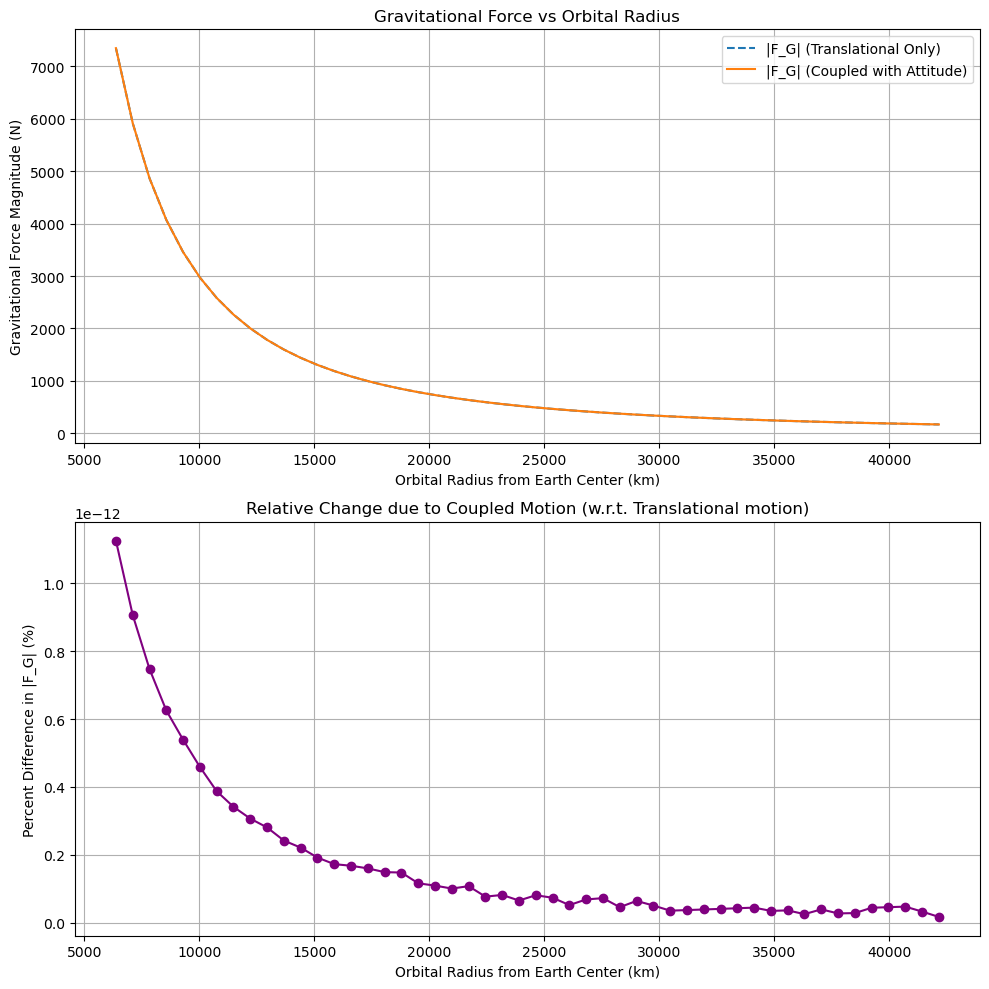

In [5]:
# Create range of orbital radii along x-axis in ECI
R_c_magnitudes = np.linspace(earth_radius, geo_radius, 50)
FG_coupled, FG_translational, FG_percent_diff = [], [], []

for R in R_c_magnitudes:
    R_vec = np.array([R, 0, 0])  # Assume ECI x-direction
    F_coupled, F_trans, delta = compute_FG_vector(R_vec, I_tensor, m)
    
    mag_coupled = np.linalg.norm(F_coupled)
    mag_trans = np.linalg.norm(F_trans)
    mag_delta = np.linalg.norm(delta)
    
    FG_coupled.append(mag_coupled)
    FG_translational.append(mag_trans)
    FG_percent_diff.append(100 * mag_delta / mag_trans)

# Plot dual subplot
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Top plot: absolute magnitudes
axs[0].plot(R_c_magnitudes / 1e3, FG_translational, label='|F_G| (Translational Only)', linestyle='--')
axs[0].plot(R_c_magnitudes / 1e3, FG_coupled, label='|F_G| (Coupled with Attitude)', linestyle='-')
axs[0].fill_between(R_c_magnitudes / 1e3, FG_translational, FG_coupled, color='gray', alpha=0.2)
axs[0].set_xlabel('Orbital Radius from Earth Center (km)')
axs[0].set_ylabel('Gravitational Force Magnitude (N)')
axs[0].set_title('Gravitational Force vs Orbital Radius')
axs[0].legend()
axs[0].grid(True)

# Bottom plot: % difference
axs[1].plot(R_c_magnitudes / 1e3, FG_percent_diff, color='purple', marker='o')
axs[1].set_xlabel('Orbital Radius from Earth Center (km)')
axs[1].set_ylabel('Percent Difference in |F_G| (%)')
axs[1].set_title('Relative Change due to Coupled Motion (w.r.t. Translational motion)')
axs[1].grid(True)

plt.tight_layout()
plt.show()

The plot above shows the variation of gravitational force magnitude, $|\mathbf{F}_G|$, with respect to orbital radius from Earth's center. Two cases are plotted:

- **Translational Only**: This is the classic Newtonian gravitational attraction assuming the spacecraft is a point mass.
- **Coupled with Attitude**: This includes additional terms accounting for the spacecraft’s attitude and inertia tensor (i.e., gravity gradient coupling effects).

From the first plot, we observe that for a given orbital altitude, the gravitational force remains approximately constant — this assumes a uniform gravitational field and no variation in orbital height throughout the trajectory segmed Motion

The second plot quantifies the **percent difference** in gravitational force due to attitude coupling. It compares the coupled force against the purely translational force:

$$
\text{Percent Difference} = \frac{|\mathbf{F}_{\text{coupled}}| - |\mathbf{F}_{\text{translational}}|}{|\mathbf{F}_{\text{translational}}|} \times 100
$$

The relative change is extremely small — on the order of $10^{-12}\%$. This confirms that for typical spacecraft geometries and orbital distances, the additional forcing introduced by attitude-inertia coupling is **negligible** in the overall translational dynamics.

Nonetheless, this effect becomes conceptually significant in **precision orbit-attitude modeling** or when dealing with long-duration missions, flexible structures, or very sensitive force-torque models.

### 3.2.3.2 - $F_G$ vs Eccentricity of Orbit

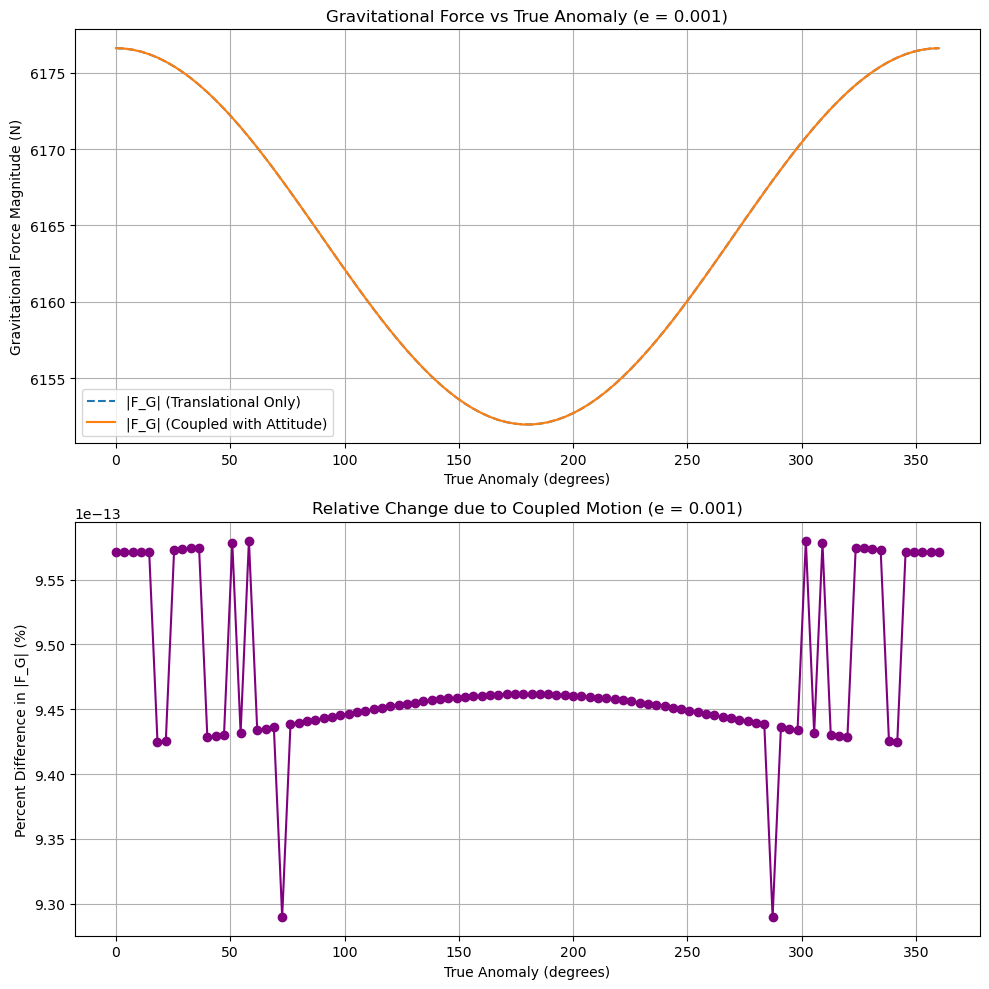

In [6]:
# Orbit parameters
a = 6964e3  # semi-major axis in meters
e = 0.001      # eccentricity

# Sweep through true anomaly
true_anomalies = np.linspace(0, 2 * np.pi, 100)
radii = a * (1 - e**2) / (1 + e * np.cos(true_anomalies))
#print(radii)

FG_coupled, FG_translational, FG_percent_diff = [], [], []

for r in radii:
    R_vec = np.array([r, 0, 0])
    F_coupled, F_trans, delta = compute_FG_vector(R_vec, I_tensor, m)
    mag_coupled = np.linalg.norm(F_coupled)
    mag_trans = np.linalg.norm(F_trans)
    mag_delta = np.linalg.norm(delta)
    
    FG_coupled.append(mag_coupled)
    FG_translational.append(mag_trans)
    FG_percent_diff.append(100 * mag_delta / mag_trans)

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Top plot: absolute magnitudes
axs[0].plot(np.degrees(true_anomalies), FG_translational, label='|F_G| (Translational Only)', linestyle='--')
axs[0].plot(np.degrees(true_anomalies), FG_coupled, label='|F_G| (Coupled with Attitude)', linestyle='-')
axs[0].fill_between(np.degrees(true_anomalies), FG_translational, FG_coupled, color='gray', alpha=0.2)
axs[0].set_ylabel('Gravitational Force Magnitude (N)')
axs[0].set_xlabel('True Anomaly (degrees)')
axs[0].set_title(f'Gravitational Force vs True Anomaly (e = {e})')
axs[0].legend()
axs[0].grid(True)

# Bottom plot: % difference
axs[1].plot(np.degrees(true_anomalies), FG_percent_diff, color='purple', marker='o')
axs[1].set_xlabel('True Anomaly (degrees)')
axs[1].set_ylabel('Percent Difference in |F_G| (%)')
axs[1].set_title(f'Relative Change due to Coupled Motion (e = {e})')
axs[1].grid(True)

plt.tight_layout()
plt.show()


# 3.3) Relative Equilibria Orientations

We have derived the closed-form analytical expressions for both the **gravity gradient torque** $\mathbf{L}_G$ and the **gravitational force** $\mathbf{F}_G$ acting on a rigid body in orbit around a central mass. The next question is: **Under what conditions does the gravity gradient torque $\mathbf{L}_G$ vanish?**

By classical definition, an **equilibrium state** is one in which a system experiences **no net linear or angular acceleration**. For a spacecraft in orbit (neglecting active propulsion or perturbing forces), the **center of mass follows a fixed trajectory**, and we primarily concern ourselves with **rotational dynamics**.

In spaceflight dynamics, we often analyze rotational motion with respect to the **orbit frame** — a rotating frame that moves with the spacecraft along its orbital trajectory. This frame is defined by:

<img src="Images/OrbitFrame.PNG" alt="Orbit Frame Diagram" width="500" align="left" style="margin-right: 20px;"/>

<br>

- $\hat{\mathbf{o}}_3$: pointing **radially outward** from the Earth to the spacecraft,
- $\hat{\mathbf{o}}_1$: pointing **tangentially** along the velocity vector,
- $\hat{\mathbf{o}}_2$: completing the right-handed triad (**cross-track** direction).

<br>

In a **relative equilibrium**, we are not interested in rotation relative to the inertial frame (ECI), but rather with respect to this **rotating orbit frame**. For instance, if a satellite (like the ISS or an Earth-pointing imager) always maintains a fixed attitude **relative to the Earth**, then it is essentially in **relative equilibrium** with respect to the orbit frame — even though its inertial orientation is changing continuously.

<br>

So in essence, we are interested in determining **how the body is oriented with respect to the rotating orbit frame**, and specifically, the orientation/attitude that achieves zero torque. This implies zero rotational acceleration and thus achieving a relative equilibria state — a state in which the rigid body's attitude remains fixed relative to the rotating from (**NOT the inertial frame!**).

Thus, the purpose of this section is:
- To identify orientations where the **gravity gradient torque vanishes**,
- To understand the role of the **orbit frame** in defining equilibrium conditions,
- And to characterize **passively stable attitudes** for orbiting rigid bodies.

From module 1 and module 2, we know Euler's Rotational Equations of Motion,

$$
[I] \dot{\boldsymbol{\omega}}_{B/N} + [\tilde{\boldsymbol{\omega}}_{B/N}] [I] \boldsymbol{\omega}_{B/N} = \mathbf{L}_G 
$$

Here, $\boldsymbol{\omega}_{B/N}$ is the angular velocity of the **body frame** $\mathcal{B}$ with respect to the **inertial frame** $\mathcal{N}$ related via the **orbit frame** $\mathcal{O}$ , as follows:

$$
\boldsymbol{\omega}_{B/N} = \boldsymbol{\omega}_{B/O} + \boldsymbol{\omega}_{O/N}
$$

- where $\boldsymbol{\omega}_{O/N}$ is your **mean orbit rate** about your cross-track axis ($\hat{\mathbf{o_2}}$). This just describes the rate at which the $\mathcal{O}$-frame rotates in an orbit with respect to the inertial $\mathcal{N}$-frame:

    $$
    \boldsymbol{\omega}_{O/N} = n \, \hat{\boldsymbol{o}}_2
    $$

- And, $\boldsymbol{\omega}_{B/O}$ is the angular velocity component that directly describes the rotation of the B-frame relative to O-frame. For relative equilibria condition, it is necessary that:

    $$
    \boldsymbol{\omega}_{B/O} = \mathbf{0}
    $$

**<ins>Condition 1: Lining up one of the principal axes to the orbit frame's axis</ins>**

We know:

$$
\mathbf{L}_G = \frac{3 G M_e}{R_c^5} \, \mathbf{R}_c \times [I] \mathbf{R}_c
$$

To ensure $\mathbf{L}_G = \mathbf{0}$, we must align one of the principal axes of the body with one of the unit vectors of the $\mathcal{O}$-frame. That is, $\mathbf{R}_c \parallel \text{principal axis of } [I]$.

If a **body principal axis** (say $\hat{\mathbf{b}}_3$) is aligned with the orbit frame’s radial direction $\hat{\mathbf{o}}_3$, then when we express the inertia tensor in the **orbit frame**, the $\hat{\mathbf{o}}_3$ axis becomes a **principal axis**. By the definition of principal axes:

- The **products of inertia** coupling this axis to the others must vanish.
- The inertia tensor becomes **block-diagonal** in the orbit frame.

Hence, the inertia tensor in the orbit frame $\mathcal{O}$ takes the form:

$$
[I]^{\mathcal{O}} =
\begin{bmatrix}
I_{11} & I_{12} & 0 \\
I_{12} & I_{22} & 0 \\
0 & 0 & I_{33}
\end{bmatrix}
$$

With this form, we evaluate in the $\mathcal{O}$-frame:

$$
\mathbf{R}_c = 
\begin{bmatrix}
0 \\
0 \\
R_c
\end{bmatrix}, \quad 
[I]^{\mathcal{O}} \mathbf{R}_c = 
\begin{bmatrix}
0 \\
0 \\
I_{33} R_c
\end{bmatrix}
$$

Then:

$$
\mathbf{R}_c \times [I] \mathbf{R}_c = 
\begin{bmatrix}
0 \\
0 \\
R_c
\end{bmatrix}
\times
\begin{bmatrix}
0 \\
0 \\
I_{33} R_c
\end{bmatrix}
= \mathbf{0}
$$

Thus, **no torque is generated** — the gravity gradient cannot twist the spacecraft because it is already aligned along one of its dynamically neutral configurations.

- Alignment of $\mathbf{R}_c$ with a **principal axis** eliminates torque because the direction of inertia-induced restoring moments aligns with the torque arm.
- The **gravity field cannot exploit any asymmetry** in the mass distribution to produce a restoring torque — the satellite is already "balanced".

**<ins>Condition 2: Zero Gyroscopic Acceleration</ins>**

All quantities from this point forward — including the inertia matrix and angular velocity vector — are expressed in the **orbit frame** $\mathcal{O}$ for clarity and consistency.

We begin with the gyroscopic acceleration term from Euler’s rotational equation:

$$
[\tilde{\boldsymbol{\omega}}_{B/N}] [I] \boldsymbol{\omega}_{B/N}
$$

For relative equilibrium, we’ve already established from Condition 1 that the spacecraft is not rotating with respect to the orbit frame:

$$
\boldsymbol{\omega}_{B/O} = \mathbf{0} \quad \Rightarrow \quad \boldsymbol{\omega}_{B/N} = \boldsymbol{\omega}_{O/N}
$$

In the orbit frame $\mathcal{O}$, the angular velocity of the orbit frame with respect to inertial is:

$$
\boldsymbol{\omega}_{B/N}^{\mathcal{O}} = n \hat{\mathbf{o}}_2 =
n 
\begin{bmatrix}
0 \\
1 \\
0
\end{bmatrix}
$$

The associated skew-symmetric cross-product matrix is:

$$
[\tilde{\boldsymbol{\omega}}_{B/N}] = 
n
\begin{bmatrix}
0 & 0 & 1 \\
0 & 0 & 0 \\
-1 & 0 & 0
\end{bmatrix}
$$

Now compute the gyroscopic term, using the inertia tensor structure from Condition 1:

$$
[\tilde{\boldsymbol{\omega}}_{B/N}] [I] \boldsymbol{\omega}_{B/N} = n^2 
\begin{bmatrix}
0 & 0 & 1 \\
0 & 0 & 0 \\
-1 & 0 & 0
\end{bmatrix}
\begin{bmatrix}
I_{11} & I_{12} & 0 \\
I_{12} & I_{22} & 0 \\
0 & 0 & I_{33}
\end{bmatrix}
\begin{bmatrix}
0 \\
1 \\
0
\end{bmatrix}
= n^2 
\begin{bmatrix}
0 \\
0 \\
-I_{12}
\end{bmatrix}
$$

For this to be **zero**, we require:

$$
I_{12} = 0
$$

Why not $n = 0$?

- $n$ is the orbital angular rate, which describes how fast the spacecraft's **orbit frame** rotates relative to the **inertial frame**.
- As the spacecraft gets **closer to Earth** (i.e., decreasing orbital altitude), $n \rightarrow \infty$. This is not physically realizable.
- As the spacecraft gets **infinitely far from Earth**, $n \rightarrow 0$. In this case, it would no longer be in orbit, which defeats the problem's context.

Thus, in all practical orbital scenarios, $n$ is always **finite** and **non-zero**.

Therefore, the only way to satisfy the gyroscopic condition:

$$
[\tilde{\boldsymbol{\omega}}_{B/N}] [I] \boldsymbol{\omega}_{B/N} = 0
$$

is by requiring:

$$
I_{12} = 0
$$

This means that the **inertia tensor must be diagonal in the orbit frame** — i.e., the **body frame and orbit frame must be aligned**.


**<ins>Conclusion</ins>**

To achieve **zero gyroscopic torque** in a state of **relative equilibrium**:

- The **inertia tensor must be diagonal in the orbit frame**, i.e., all **off-diagonal terms of $[I]^{\mathcal{O}}$ must vanish**.  
  This condition ensures that the **gyroscopic coupling term** in Euler’s rotational equations drops to zero.

- This reinforces the earlier condition:  
  For both the **gravity-gradient torque** and the **gyroscopic torque** to vanish, the **body frame must be aligned with the orbit frame** — the spacecraft must be oriented such that its **principal axes** are aligned with the orbit frame’s axes.

- While there are **six valid permutations** (due to principal axes being orthogonal), only these **strict alignments** lead to a true relative equilibrium.  
  Any **misalignment**, even if small, introduces restoring torques due to asymmetries in mass distribution and rotational dynamics.

In essence, **a skewed orientation** between the body and orbit frame guarantees that **gravitational and gyroscopic torques will arise**, pulling the system away from equilibrium.

---

# 3.4) Linear Stability about Equilibria State

So far, we have:

- Derived the closed-form analytical expression for the **gravity-gradient torque** $\mathbf{L}_G$.
- Extended the classical gravitational force model to express $\mathbf{F}_G$ for a **rigid body**, incorporating **second-order corrections** to capture how attitude influences the net force.
- Identified conditions under which **torques vanish**, revealing specific **relative equilibrium orientations** for the spacecraft.

Naturally, the next step is to ask:

> What happens if the spacecraft is slightly perturbed from this equilibrium orientation?

Being in equilibrium is not enough — we must determine whether the spacecraft:
- **Returns** to its original equilibrium (stable),
- **Oscillates** about it (marginally stable), or
- **Diverges** away (unstable).

This requires a **linearized stability analysis** about the relative equilibrium attitude.

We will study how small angular deviations evolve over time under the influence of **gravity-gradient torque**, which in this section is the **only external moment** acting on the spacecraft.

To analyze this clearly, we adopt the **orbit frame** $\mathcal{O}$ (sometimes referred to as “airplane” or “ship” frame) and the conventions of the rotations about the respective axes as follows:

- $\hat{\mathbf{o}}_1$ — Along-track axis (tangential to orbit) → **roll**  
- $\hat{\mathbf{o}}_2$ — Cross-track axis (normal to orbital plane) → **pitch**  
- $\hat{\mathbf{o}}_3$ — Radial axis (Earth center to spacecraft) → **yaw**

This coordinate system will form the basis for our **perturbation dynamics**.

## 3.4.1 - Expressing Angular Velocity in the Body Frame

We begin this linearized gravity-gradient stability study by defining the **angular velocity components** in the **orbit frame** $\mathcal{O}$.

We know from previous sections:

- The **inertial angular velocity** of the orbit frame $\mathcal{O}$ with respect to the inertial frame $\mathcal{N}$ is aligned with the **cross-track axis** $\hat{\mathbf{o}}_2$:

  $$
  \boldsymbol{\omega}_{O/N} = \Omega \, \hat{\mathbf{o}}_2
  $$

- For a **circular orbit**, the magnitude of this orbital angular velocity is constant and derived from **Kepler’s third law**:

  $$
  \Omega^2 = \frac{G M_e}{R_c^3}
  $$

  where:
  - $G$ is the gravitational constant  
  - $M_e$ is the mass of Earth  
  - $R_c$ is the orbital radius from Earth's center to the satellite


Next, the **angular velocity of the body frame $\mathcal{B}$ relative to the orbit frame $\mathcal{O}$** is defined as:

$$
\boldsymbol{\omega}_{B/O}
$$

> Earlier, under **relative equilibrium conditions**, we set this to:
> $$
\boldsymbol{\omega}_{B/O} = \mathbf{0}
$$

However, in this section, we will now consider **small deviations** from equilibrium. So:

- $\boldsymbol{\omega}_{B/O} \ne \mathbf{0}$
- It now represents the **small rotational perturbations** of the spacecraft **about the equilibrium orientation**.

This vector will serve as one of the state variables in the upcoming **linearized equations of motion** for the rigid body.

Now that we've introduced small angular deviations from the equilibrium configuration, we analyze the **resulting motion** of the spacecraft in terms of **Euler angles**.

**<ins>Introducing Euler Angles</ins>**

We adopt the **3-2-1 (Yaw-Pitch-Roll)** Euler angle sequence, which is commonly used in aerospace applications. These angles describe the body frame $\mathcal{B}$ relative to the orbit frame $\mathcal{O}$.

Let:

- $\psi$ = yaw (rotation about $\hat{\mathbf{o}}_3$)
- $\theta$ = pitch (rotation about new $\hat{\mathbf{o}}_2$)
- $\phi$ = roll (rotation about final $\hat{\mathbf{o}}_1$)


**<ins>Express Angular Velocity from Euler Angles</ins>**

From **rigid body kinematics**, we relate the Euler angle rates $\dot{\psi}, \dot{\theta}, \dot{\phi}$ to the **body angular velocity** of the spacecraft **relative to the orbit frame**:

$$
^{\mathcal{B}}{\boldsymbol{\omega}}_{B/O} =
\begin{bmatrix}
-\sin \theta & 0 & 1 \\
\sin \phi \cos \theta & \cos \phi & 0 \\
\cos \phi \cos \theta & -\sin \phi & 0
\end{bmatrix}
\begin{bmatrix}
\dot{\psi} \\
\dot{\theta} \\
\dot{\phi}
\end{bmatrix}
$$

This gives the angular velocity of the body expressed in **body frame coordinates**, consistent with how we apply Euler's rotational equations of motion.

**<ins>Add Orbit Frame Angular Velocity</ins>**

Finally, the **total angular velocity of the spacecraft relative to inertial**, expressed in the **body frame**, is:

$$
\boldsymbol{\omega}_{B/N} = \boldsymbol{\omega}_{B/O} + \boldsymbol{\omega}_{O/N}
$$

So, to evaluate this in a common frame (body frame), we transform $\boldsymbol{\omega}_{O/N}$ to the body frame next.


**<ins>Define the Rotation Matrix from $\mathcal{O}$ to $\mathcal{B}$</ins>**

To proceed further with the dynamics, we must express quantities like angular velocity vectors in a **common reference frame** — in this case, the **body frame** $\mathcal{B}$.

From rigid body kinematics, we can define the **rotation matrix** from the orbit frame $\mathcal{O}$ to the body frame $\mathcal{B}$ using the 3-2-1 Euler angles $(\psi, \theta, \phi)$:

Let $c = \cos$ and $s = \sin$ for brevity. The rotation matrix $[BO]$ is:

$$
[BO] =
\begin{bmatrix}
c\theta c\psi & c\theta s\psi & -s\theta \\
s\phi s\theta c\psi - c\phi s\psi & s\phi s\theta s\psi + c\phi c\psi & s\phi c\theta \\
c\phi s\theta c\psi + s\phi s\psi & c\phi s\theta s\psi - s\phi c\psi & c\phi c\theta
\end{bmatrix}
$$

This matrix transforms any vector expressed in the orbit frame into the body frame.

**<ins>Project $\boldsymbol{\omega}_{O/N}$ into the Body Frame</ins>**

To compute angular velocity components **expressed in the body frame**, we rotate the known orbital angular velocity:

$$
\boldsymbol{\omega}_{O/N}^{\mathcal{O}} = \Omega \hat{\mathbf{o}}_2
$$

Using the $[BO]$ transformation, the angular velocity of the **orbit frame with respect to inertial**, **expressed in the body frame**, becomes:

$$
^{\mathcal{B}}{}{\boldsymbol{\omega}}_{O/N} =
[BO] \, \boldsymbol{\omega}_{O/N}^{\mathcal{O}} =
[BO] \left( \Omega \hat{\mathbf{o}}_2 \right)
$$

Extracting the second column of $[BO]$, we obtain:

$$
^{\mathcal{B}}{\boldsymbol{\omega}}_{O/N} =
\Omega
\begin{bmatrix}
c\theta s\psi \\
s\phi s\theta s\psi + c\phi c\psi \\
c\phi s\theta s\psi - s\phi c\psi
\end{bmatrix}
$$

This is the **orbit frame angular velocity**, projected into the body frame — which we can now combine with the body's own rotation $\boldsymbol{\omega}_{B/O}$ to compute the total $\boldsymbol{\omega}_{B/N}$ in body frame coordinates.

This step is essential to express all terms in Euler’s rotational equations in a **consistent frame**, so that we can analyze the torque response due to gravity-gradient effects.

We now have expressions for:
- The spacecraft’s angular velocity **relative to the orbit frame**, $\boldsymbol{\omega}_{B/O}$, and
- The orbit frame’s angular velocity **relative to the inertial frame**, $\boldsymbol{\omega}_{O/N}$.

Using rigid body kinematics, we combine these to obtain the **total angular velocity of the spacecraft relative to the inertial frame**, all **expressed in the body frame** $\mathcal{B}$:

$$
^{\mathcal{B}}\boldsymbol{\omega}_{B/N} = ^{\mathcal{B}}\boldsymbol{\omega}_{B/O} + ^{\mathcal{B}}\boldsymbol{\omega}_{O/N}
$$

Substituting the expressions derived previously, we get:

$$
^{\mathcal{B}} \boldsymbol{\omega}_{B/N} =
\begin{bmatrix}
\dot{\phi} - \sin\theta \, \dot{\psi} + \Omega \cos\theta \sin\psi \\
\sin{\phi} \cos{\theta} \dot{\psi} + \cos{\phi} \dot{\theta} + \Omega ( \sin\phi \sin\theta \sin\psi + \cos\phi \cos\psi ) \\
\cos\phi \cos\theta \dot{\psi} - \sin\phi \dot{\theta} + \Omega ( \cos\phi \sin\theta \sin\psi - \sin\phi \cos\psi )
\end{bmatrix}
$$

**<ins>Interpretation</ins>**

This final form gives the **inertial angular velocity vector** of the spacecraft, resolved in the **body frame**, and accounts for both the spacecraft’s own motion and the rotation of the orbit frame in which it moves.

**Note**:  
This expression is **nonlinear** and **exact**, meaning it is valid even for **large angular displacements** between the body and orbit frames. No linearization or small-angle assumptions have been applied yet.

## 3.4.2 - Linearization and Stability Analysis about Relative Equilibrium

Having already derived the exact nonlinear expression for $\boldsymbol{\omega}_{B/N}$ in the body frame, we now proceed to linearize it using the small-angle assumption for Euler angles.

Although we are still evaluating the angular velocity of the spacecraft with respect to the inertial frame ($\boldsymbol{\omega}_{B/N}$), the small-angle expansion is based on the spacecraft's orientation being close to alignment with the orbit frame $\mathcal{O}$. That is, the Euler angles $(\phi, \theta, \psi)$ — which describe $\mathcal{B}$ relative to $\mathcal{O}$ — are assumed to be small.

This approximation enables us to express $\boldsymbol{\omega}_{B/N}$ as a simplified linear combination of $\phi$, $\theta$, $\psi$, and their time derivatives. 

To linearize the exact expression for $\boldsymbol{\omega}_{B/N}$, we apply the small-angle approximations:

- $\sin(\psi) \approx \psi$, $\cos(\psi) \approx 1$  
- $\sin(\theta) \approx \theta$, $\cos(\theta) \approx 1$  
- $\sin(\phi) \approx \phi$, $\cos(\phi) \approx 1$

In this process, **products of small quantities** (e.g., $\theta \cdot \dot{\psi}$) become **second-order terms** and are therefore neglected:

$$
\sin\theta \, \dot{\psi} \approx 0
$$

This simplification significantly reduces the complexity of the expression while retaining the dominant first-order dynamics near the equilibrium configuration.

Then this yields the following simplified expression of $\boldsymbol{\omega}_{B/N}$:

$$
^{\mathcal{B}} \boldsymbol{\omega}_{B/N} =
\begin{bmatrix}
\dot{\phi} + \Omega \sin\psi \\
\dot{\theta} + \Omega \\
\dot{\psi} - \Omega \sin\phi
\end{bmatrix}
$$